In [1]:
import sys
import json
import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from src.cipher_utils import encode, create_encrytpion_dict
from src.corpus_utils import get_letter_frequencies
from src.mcmc import cross_validation, eval_solutions, eval_close_solutions, is_close_solution

In [16]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [17]:
print(f"Text length: {len(text)}")

Text length: 468


In [4]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

with open("../data/en_corpus.txt") as file:
    corpus = file.read().lower()

encryption_dict = create_encrytpion_dict()
encoded_text = encode(text, encryption_dict)
attempts = 50
iters = 25000

In [5]:
print("Original text:\n")
print(text)
print("\nEncoded text:\n")
print(encoded_text)

Original text:

whiskers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty boxes, he found his prize: a forgotten box of tuna. he purred victoriously, the fearless feline captain of tuna island.

Encoded text:

d3jh?smhld,hl9rlrm.j9,mqli,8l3slts5jsbs.l3sld,hl,lgjm,8snls,i3l1rm9j9;0l3sli5j1ts.l83sl8,55sh8lh3s5ulj9l83sl3rohs0l1srds.l5j?sl,li,g8,j90l,9.lt,88s.l.rd9l,9q83j9;lj9l3jhlg,83nlr9sl.,q0l3sl.jhirbsms.l,limo1g5s.l8ms,homsl1,glo9.sml83slmo;nl8,j5l3j;30l3slur55rds.lj8l83mro;3l83sl;,m.s90lo9.sml83slus9is0l,9.lj98rl83sl9sj;3trmhlh3s.nl83sms0l,1r9;l.oh8qltr4sh0l3sluro9.l3jhlgmj6s2l,lurm;r88s9ltr4lrul8o9,nl3slgomms.lbji8rmjroh5q0l83slus,m5shhlus5j9sli,g8,j9lrul8o9,ljh5,9.n


In [6]:
corpus_letters, corpus_frequencies = get_letter_frequencies(corpus)
text_letters, text_frequencies = get_letter_frequencies(encoded_text)

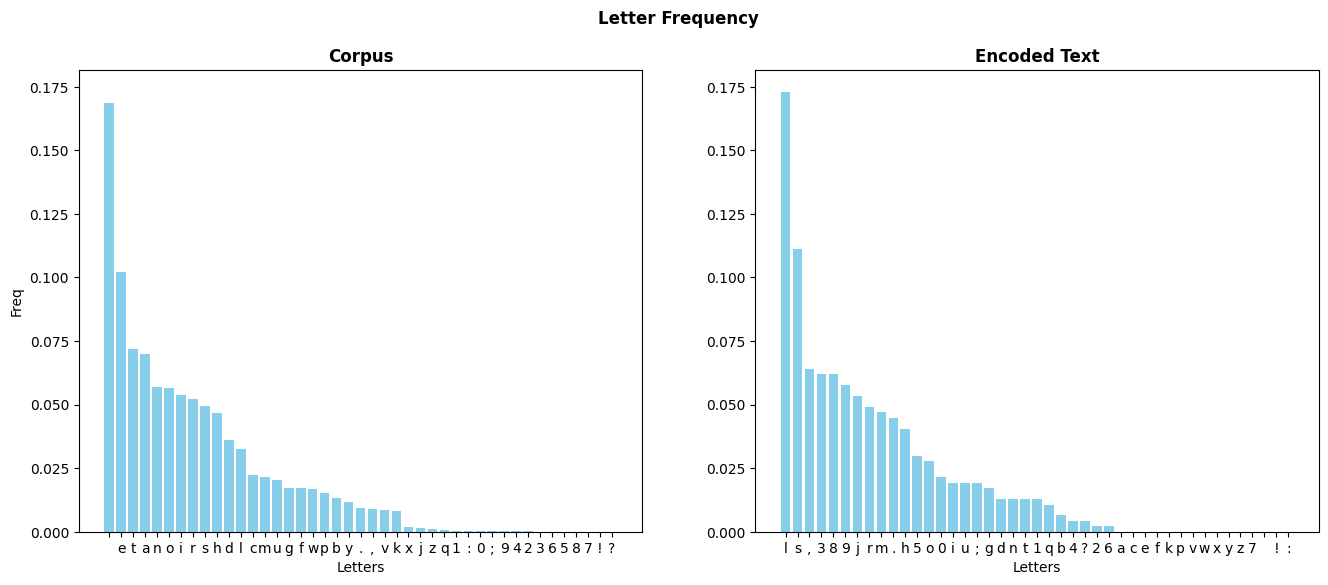

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle("Letter Frequency", fontweight="bold")

ax1.bar(corpus_letters, corpus_frequencies, color="skyblue")
ax1.set_xlabel("Letters")
ax1.set_ylabel("Freq")
ax1.set_title("Corpus", fontweight="bold")

ax2.bar(text_letters, text_frequencies, color="skyblue")
ax2.set_xlabel("Letters")
ax2.set_title("Encoded Text", fontweight="bold")
ax2.tick_params(labelleft=True)

plt.show()

We ary trying to improve the algorithm by specifying starting encryption dict. In default implementation the random one is used. Here we suppose that letters with high frequencies in encoded text were originally letters with high frequencies in corpus.

In [8]:
freq_based_encryption_dict = {corpus_letters[i]: text_letters[i] for i in range(len(corpus_letters))}
print(freq_based_encryption_dict)

{' ': 'l', 'e': 's', 't': ',', 'a': '3', 'n': '8', 'o': '9', 'i': 'j', 'r': 'r', 's': 'm', 'h': '.', 'd': 'h', 'l': '5', 'c': 'o', 'm': '0', 'u': 'i', 'g': 'u', 'f': ';', 'w': 'g', 'p': 'd', 'b': 'n', 'y': 't', '.': '1', ',': 'q', 'v': 'b', 'k': '4', 'x': '?', 'j': '2', 'z': '6', 'q': 'a', '1': 'c', ':': 'e', '0': 'f', ';': 'k', '9': 'p', '4': 'v', '2': 'w', '3': 'x', '6': 'y', '5': 'z', '8': '7', '7': ' ', '!': '!', '?': ':'}


In [9]:
all_samples, all_scores = cross_validation(attempts, encoded_text, perc_dict, iters)
all_samples_freq, all_scores_freq = cross_validation(attempts, encoded_text, perc_dict, iters, encryption_dict=freq_based_encryption_dict)

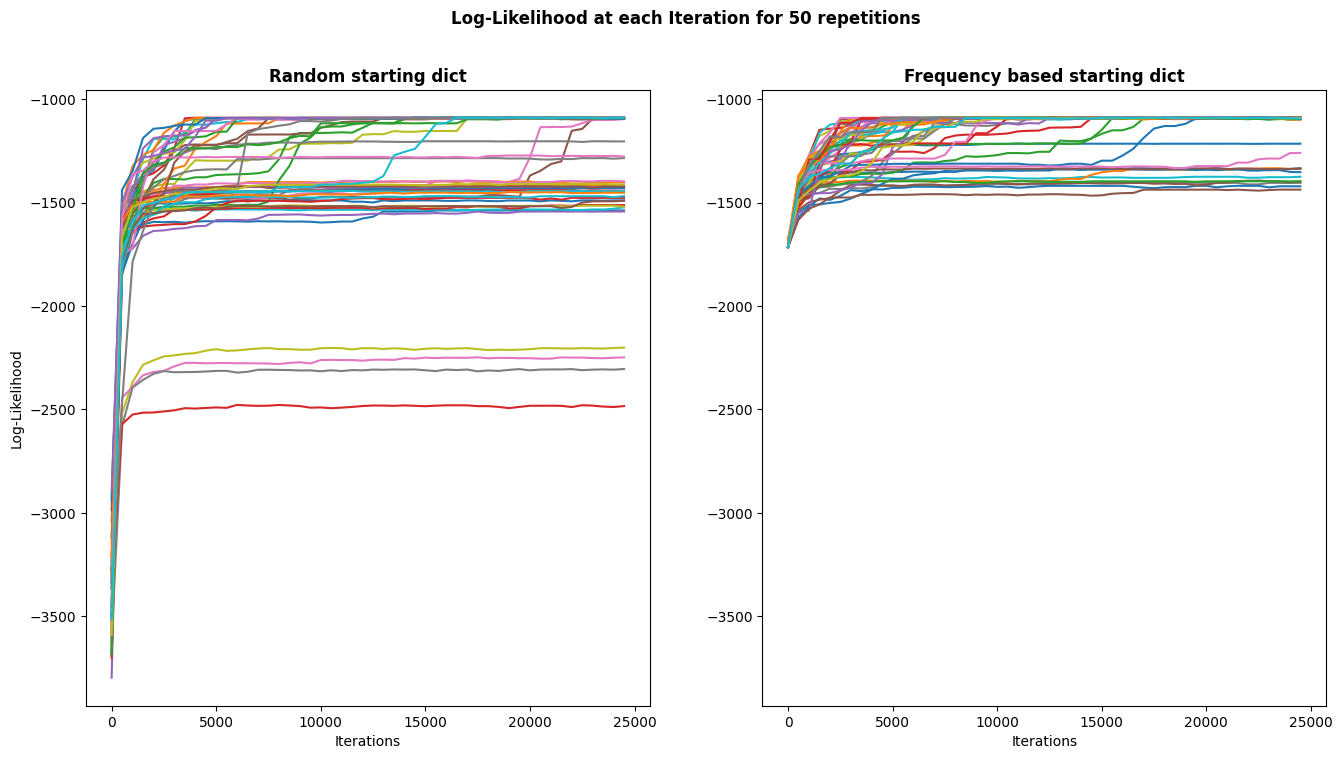

In [10]:
range_iters = list(range(0, iters, 500))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.suptitle(f"Log-Likelihood at each Iteration for {attempts} repetitions", fontweight="bold")

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Log-Likelihood")
ax1.set_title("Random starting dict", fontweight="bold")
for i in range(len(all_scores)):
    ax1.plot(range_iters, all_scores[i])

ax2.set_xlabel("Iterations")
ax2.set_title("Frequency based starting dict", fontweight="bold")
ax2.tick_params(labelleft=True)
for i in range(len(all_scores_freq)):
    ax2.plot(range_iters, all_scores_freq[i])


plt.show()

In [11]:
correct_decoding_ratio = eval_solutions(text, all_samples)
correct_decoding_ratio_freq = eval_solutions(text, all_samples_freq)
close_decoding_ratio = eval_close_solutions(text, all_samples, perc_dict)
close_decoding_ratio_freq = eval_close_solutions(text, all_samples_freq, perc_dict)

In [12]:
print("Evaluation:\n")
print(f"For {attempts} attempts with {iters} iterations each algorithm with random starting encryption dict found the correct solution with {correct_decoding_ratio} success ratio and close solution with {close_decoding_ratio} success ratio.")
print(f"For {attempts} attempts with {iters} iterations each algorithm with freq based starting dict found the correct solution with {correct_decoding_ratio_freq} success ratio and close solution with {close_decoding_ratio_freq} success ratio.")

Evaluation:

For 50 attempts with 25000 iterations each algorithm with random starting encryption dict found the correct solution with 0.1 success ratio and close solution with 0.46 success ratio.
For 50 attempts with 25000 iterations each algorithm with freq based starting dict found the correct solution with 0.14 success ratio and close solution with 0.76 success ratio.


In [15]:
for i in range(10):
    solution = all_samples_freq[i]
    correct_msg = "correct" if text == solution else "incorrect"
    close_msg = "close" if is_close_solution(text, solution, perc_dict) else "far"
    print(f"Frequency based solution {i+1} ({correct_msg}, {close_msg}):\n")
    print(solution)
    print("\n")

Frequency based solution 1 (incorrect, far):

pgosfels pts ra aldortlk utn ge hecoexed ge pts t ioltne, etug walrory. ge ucowhed nge ntccesn sgecm or nge gabse. weaped cofe t utintor. trd htnned dapr trkngory or gos itng, are dtk. ge dosuaxeled t ulbwiced nletsble wti brdel nge lby, ntoc goyg. ge maccaped on nglabyg nge ytlder. brdel nge merue. trd orna nge reoyghals sged, ngele. twary dbsnk hazes. ge mabrd gos ilojev t malyanner haz am nbrt, ge iblled xounaloabsck. nge metlcess mecore utintor am nbrt osctrd,


Frequency based solution 2 (correct, close):

whiskers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty boxes, he found his prize: a forgotten box of tuna. he purred victoriously, the fearless